# Derivative of a function

Let $f$ be a function of $f:\mathbb{R}^n \mapsto \mathbb{R}^m$. The derivative/slope of $f$ on $x$ corresponds the rate of change of $f$ with respect to $x$ and defined as :

$$ \frac{d f(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

For example, the derivative of the position of a moving object with respect to time is the object's velocity: this measures how quickly the position of the object changes when time advances. Let $x$ be time in seconds and $f$ is a function indicating the position of the ball in the direction of the right. 


* The $f_1(x)$ does not change depending on the input $x$. Consequently, an infinitesimal change on $x+h$ does not have any effect on the rate of change in $f_1$,i.e.,$f_1(x)=f_1(x+h)$. In otherwords, **the ball does not move in any direction**.

* The $f_2(x)$ changes depending on $x$. An infinitesimal change $x+h$ corresponds to an infinitesimal change on $f_2$,i.e.
$(f_2(x+h)-f_2(x))/h=1$. Consequently, the rate of change is **1**. otherwords, **the ball is moving in the direction of the right with a constant velocity.** I

* The output of $f_3$ changes depending on $x$. An infinitesimal change $x+h$ corresponds to an infinitesimal change on $f_2$,i.e.
$(f_2(x+h)-f_2(x))/h=-1$. Consequently, the rate of change is **-1**. In otherwords, **the ball moving with a constant velocity in the direction of the left**.


In [1]:
import numpy as np
np.random.seed(0)

f_1= lambda x: 0 # Gradient is always 0.
f_2= lambda x: x # Gradient is always close to 1.
f_3= lambda x: -x # Gradient is always close to -1.

f_4= lambda x: x**2 # Gradient increases as the input increases
f_5= lambda x: -x**2 # Gradient increases as the input increases
f_6= lambda x: np.sqrt(x**2).sum() 
f_7= lambda x: x.sum() 

In [2]:
def calculate_derivative(f,x):
    h=.00001
    return (f(x+h)-f(x))/h

In [3]:
# Gradients always fixed in f_1 to f_3Let's calculate derivatives of 3 different function
print('#########f_1(x)=0##########')
for x in [1.0, 1.5, 2.0 ,5.0, 10.0]:
    print('f( {0} )={1}\t df at x is {2}'.format(x,f_1(x),calculate_derivative(f_1,x)))
    
print('#########f_2(x)=x##########')
for x in [1.0, 1.5, 2.0 ,5.0, 10.0]:
    print('f( {0} )={1}\t df at x is {2}'.format(x,f_2(x),calculate_derivative(f_2,x)))
    
print('#########f_3(x)=-x##########')
for x in [1.0, 1.5, 2.0 ,5.0, 10.0]:
    print('f( {0} )={1}\t df at x is {2}'.format(x,f_3(x),calculate_derivative(f_3,x)))
    
print('#########f_4(x)=x**2##########')
for x in [1.0, 1.5, 2.0 ,5.0, 10.0]:
    print('f( {0} )={1}\t df at x is {2}'.format(x,f_4(x),calculate_derivative(f_4,x)))
    
print('#########f_5(x)=x**-2##########')
for x in [1.0, 1.5, 2.0 ,5.0, 10.0]:
    print('f( {0} )={1}\t df at x is {2}'.format(x,f_5(x),calculate_derivative(f_5,x)))

#########f_1(x)=0##########
f( 1.0 )=0	 df at x is 0.0
f( 1.5 )=0	 df at x is 0.0
f( 2.0 )=0	 df at x is 0.0
f( 5.0 )=0	 df at x is 0.0
f( 10.0 )=0	 df at x is 0.0
#########f_2(x)=x##########
f( 1.0 )=1.0	 df at x is 1.0000000000065512
f( 1.5 )=1.5	 df at x is 1.0000000000065512
f( 2.0 )=2.0	 df at x is 1.0000000000065512
f( 5.0 )=5.0	 df at x is 0.9999999999621422
f( 10.0 )=10.0	 df at x is 0.9999999999621422
#########f_3(x)=-x##########
f( 1.0 )=-1.0	 df at x is -1.0000000000065512
f( 1.5 )=-1.5	 df at x is -1.0000000000065512
f( 2.0 )=-2.0	 df at x is -1.0000000000065512
f( 5.0 )=-5.0	 df at x is -0.9999999999621422
f( 10.0 )=-10.0	 df at x is -0.9999999999621422
#########f_4(x)=x**2##########
f( 1.0 )=1.0	 df at x is 2.00001000001393
f( 1.5 )=2.25	 df at x is 3.0000100000204806
f( 2.0 )=4.0	 df at x is 4.000010000027032
f( 5.0 )=25.0	 df at x is 10.000009999444615
f( 10.0 )=100.0	 df at x is 20.00000999942131
#########f_5(x)=x**-2##########
f( 1.0 )=-1.0	 df at x is -2.000010000013

* The output of $f_4$ changes depending on $x$. Increasing $x$ increases the output of $f_3$ **significantly **. The rate of change is positively follows the the $x$. In otherwords, **the ball moving with an increasing velocity in the direction of the right**.


* The output of $f_5$ changes depending on $x$. Increasing $x$ decreases the output of $f_3$ **significantly **. The rate of change is negatively follows the behaviour of the $x$. In otherwords, **the ball moving with an increasing velocity in the direction of the left**.


# Analytical and Numerical Gradient

Up until now, We use $f:\mathbb{R}^n \mapsto \mathbb{R}^m$ where $n=1$ and $m=1$ and we **numerically calculate** the the derivative of $f$. Such numerical calculation becomes **very slow** as the $n$ increases as shown in the example below.

In [4]:
def calculate_partial_derivatives(f,x):
    """
    x is a numpy array (K,)
    f is a function that takes x as input and generates R.
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros(len(x))
    h = 0.00001

    for ith, val in enumerate(x):
        x[ith]+=h # increment by h
        fxh = f(x) # evalute f(x + h)
        # compute the partial derivative
        grad[ith]= (fxh - fx) / h # the slope
        x[ith]=val    
    return grad 

# 2. Derivatives, Gradients, Jacobians


## 2.1. Scalar valued functions
Let $f$ be a scalar valued function and defined as
(say $f:\mathbb{R}^1 \mapsto \mathbb{R}^1$). The derivative of $f$ is computed as 

$$ \frac{\partial f(x)}{\partial x} = lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$


Let $f$ be a scalar valued function and defined as
(say $f:\mathbb{R}^m \mapsto \mathbb{R}^1$). The derivative of $f$ is a vector of partial derivatives. Similarly,
$\frac{\partial f(x)}{\partial x_i}$ reveals us how much $f(x)$ increases if $x_i$ increases. Strictly speaking, **gradients** are only defined for scalar functions. For vector valued functions we are dealing with vector of partial derivatives.


In [5]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def dsigmoid(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    dr=np.ones((x.shape))
    dr[x <= 0] = 0
    return dr

In [6]:
x=np.array([-1.3, 0.5, 2.1])
print('X:\n{0}'.format(x))
print('### Sigmoid ###')
sx=sigmoid(x)
print('S:\n{0}'.format(sx))
print('dS/X:\n',dsigmoid(x))

print('### RELU ###')
rx=relu(x)
print('R:\n{0}'.format(rx))
print('dR/X:\n',drelu(x))

X:
[-1.3  0.5  2.1]
### Sigmoid ###
S:
[0.21416502 0.62245933 0.89090318]
dS/X:
 [0.16829836 0.23500371 0.0971947 ]
### RELU ###
R:
[0.  0.5 2.1]
dR/X:
 [0. 1. 1.]


## 2.2. Vector  valued functions
Let $f$ be a vector valued function (say $f:\mathbb{R}^n \mapsto \mathbb{R}^m$).

$$ f(\vec{x}):\begin{bmatrix}
\vec{x}_1\\
\vec{x}_2\\
\cdots\\
\vec{x}_n
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\vec{y}_1\\
\vec{y}_2\\
\cdots\\
\vec{y}_m
\end{bmatrix}$$


Then the gradient of $\vec{y}=f(\vec{x})$ with respect to $\vec{x}$ is a Jacobian matrix:

$$ \begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align} $$
   



In [7]:
def softmax_func(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=0)).T
    return sm
def softmax_grad(s):
    jacobian_m = np.diag(s)
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = s[i] * (1 - s[i])
            else:
                jacobian_m[i][j] = -s[i] * s[j]
    return jacobian_m

def softmax_grad_vec(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)


In [8]:
x=np.array([-1.3, 0.5, 2.1])
sx=softmax_func(x)
print('X:\n{0} \t \nS:\n{1}'.format(x,sx))
print('J:\n',softmax_grad(sx))

X:
[-3.4 -1.6  0. ] 	 
S:
[0.02701699 0.16344326 0.80953975]
J:
 [[ 0.02628707 -0.00441574 -0.02187133]
 [-0.00441574  0.13672956 -0.13231381]
 [-0.02187133 -0.13231381  0.15418514]]


In [9]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import torch
npx.set_np()

# Forward and backwards in function

# RELU

$$ \operatorname{ReLU}(x) = \max(x, 0)$$


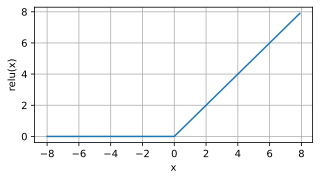

In [10]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

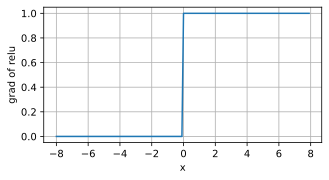

In [11]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

# Sigmoid

$$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$ 



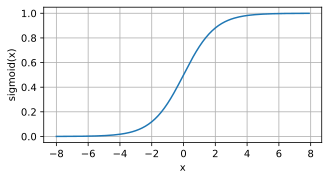

In [12]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

$$ \frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

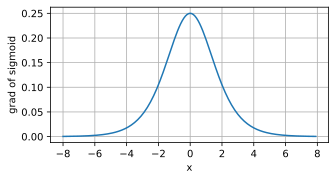

In [13]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

# Tanh

$$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$


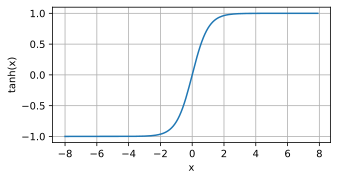

In [14]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

$$ \frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

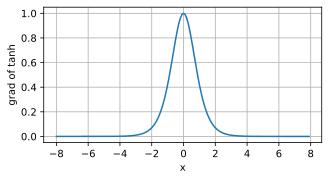

In [15]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))